In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import statsmodels.formula.api as sm 


In this course we will try to fit multiple linear regression models to data
- more explanatory variables often give you more insights on the response and provide accurate predictions


In [3]:
fish = pd.read_csv("fish.csv")

In [4]:
fish.head()

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5


In [5]:
#we want to create a model with one categorical variable and 1 quantitative 


mdl_mass_vs_both =sm.ols("mass_g~length_cm+species+0",data=fish).fit()
print(mdl_mass_vs_both.params)

species[Bream]    -672.241866
species[Perch]    -713.292859
species[Pike]    -1089.456053
species[Roach]    -726.777799
length_cm           42.568554
dtype: float64


- Let's visualize predictions for this we are going to use the seaborn function lmplot

- We want to visualize both explanatory variables , the categorical one and numeric one .
- This model includes 4 categories , which results in 1 intercept in each category , and got 1 slope which is length_cm .
- Don't get confused here ; the coefficients of categorical variables aren't  the means of each categorical variable .

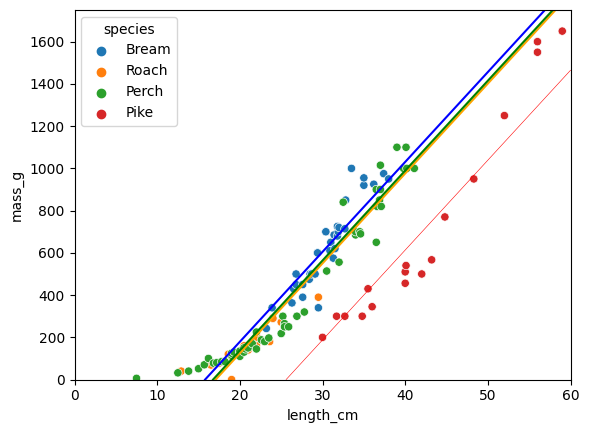

In [6]:
sns.scatterplot(x="length_cm", y="mass_g", data=fish, hue="species")
# now for each specie we are going to draw the regression line
#Store intercepts
parameters = mdl_mass_vs_both.params
br_inter = parameters[0]
ro_inter = parameters[3]
per_inter = parameters[1]
pi_inter = parameters[2]
slope=parameters[4]

plt.axline(xy1=(0,br_inter),slope=slope,color="blue")
plt.axline(xy1=(0,ro_inter),slope=slope,color="orange")

plt.axline(xy1=(0,per_inter),slope=slope,color="green")

plt.axline(xy1=(0,pi_inter),slope=slope,color="red",linewidth=0.4)
plt.ylim(0,1750)
plt.xlim(0,60)

plt.show()



- Taiwan real estate 

In [7]:
taiwan_real_estate=pd.read_csv("taiwan_real_estate2.csv")
# Fit a linear regression of price_twd_msq vs. n_convenience
mdl_price_vs_conv = sm.ols("price_twd_msq ~ n_convenience",
                        data=taiwan_real_estate).fit()

# Fit a linear regression of price_twd_msq vs. house_age_years, no intercept
mdl_price_vs_age = sm.ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Fit a linear regression of price_twd_msq vs. n_convenience plus house_age_years, no intercept
mdl_price_vs_both =sm.ols("price_twd_msq ~ house_age_years + n_convenience+0", data=taiwan_real_estate).fit()
# Print the coefficients
print(mdl_price_vs_both.params)


house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64


- Look at the coefficients of mdl_price_vs_both. What is the meaning of the n_convenience coefficient?
  - For each additional nearby convenience store, the expected house price, in TWD per square meter, increases by 0.79.
- What is the meaning of the "0 to 15 years" coefficient?
  - For a house aged 0 to 15 years with zero nearby convenience stores, the expected house price is 9.41 TWD per square meter.

# Predicting parallel slopes 

- we need to have the same shape of data we had before , for that we need to include categorical data .
- For that we need to assign some values in length_cm with some species , we gotta use , cartesian product from itertools module .

- and to calculate predictions manually we gotta use  np.select(list of conditions, list of actions) , to choose intercept based on  type of specie we are tryong to predict


In [8]:
from itertools import product
prd=product(fish["species"].unique(),np.arange(5,61,5))
#outputs all combinations from it's output 
expl_data_length= pd.DataFrame(prd,columns=["species","length_cm"])


In [9]:
expl_data_length.head()

,species,length_cm
0,Bream,5
1,Bream,10
2,Bream,15
3,Bream,20
4,Bream,25


In [10]:
# time to make some predictions 

predictions=expl_data_length.assign(mass_g=mdl_mass_vs_both.predict(expl_data_length))

In [11]:
expl_data_length.head()
#we have some negative predicted mass in our data

,species,length_cm
0,Bream,5
1,Bream,10
2,Bream,15
3,Bream,20
4,Bream,25


- Time to visualize predictions using parallel slopes

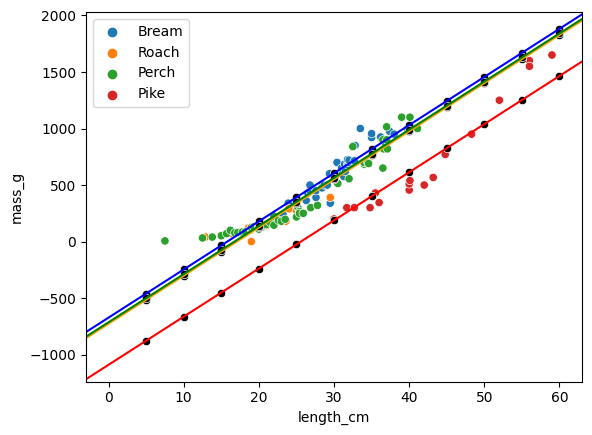

In [12]:
param_fish = mdl_mass_vs_both.params
ic_bream, ic_perch, ic_pike, ic_roach, slope = param_fish

sns.scatterplot(x="length_cm", y="mass_g", data=fish, hue="species")
plt.axline(xy1=(0, ic_bream), slope=slope, color="blue")
plt.axline(xy1=(0, ic_roach), slope=slope, color="orange")
plt.axline(xy1=(0, ic_perch), slope=slope, color="green")
plt.axline(xy1=(0, ic_pike), slope=slope, color="red")
sns.scatterplot(x="length_cm", y="mass_g", data=predictions, color="black")
plt.show()


- Let's try to run predictions manually . 


In [13]:
conditions = [expl_data_length["species"] == "Bream",
              expl_data_length["species"] == "Roach",
              expl_data_length["species"] == "Perch",
              expl_data_length["species"] == "Pike"]

actions = [ic_bream,ic_roach,ic_perch,ic_pike]




expl_data_length["intercept"] = np.select(conditions,actions)
expl_data_length.head()


,species,length_cm,intercept
0,Bream,5,-672.241866
1,Bream,10,-672.241866
2,Bream,15,-672.241866
3,Bream,20,-672.241866
4,Bream,25,-672.241866


In [14]:
expl_data_length["mass_g"] = expl_data_length["intercept"]+expl_data_length["length_cm"]*slope

In [15]:
expl_data_length.head()

,species,length_cm,intercept,mass_g
0,Bream,5,-672.241866,-459.399096
1,Bream,10,-672.241866,-246.556325
2,Bream,15,-672.241866,-33.713555
3,Bream,20,-672.241866,179.129216
4,Bream,25,-672.241866,391.971986


In [16]:
predictions.head()

,species,length_cm,mass_g
0,Bream,5,-459.399096
1,Bream,10,-246.556325
2,Bream,15,-33.713555
3,Bream,20,179.129216
4,Bream,25,391.971986


- Using many explanatory variables increase  the determination coefficient of the model and it  may cause overfitting. 
- The R squared adjusted penalizes coefficiant for each explanatory variable added to compensate this effect . 
- In multiple linear regression we don't use the determination coefficinet to assess the performance of the model . 

$\bar{R^{2}}=1-(1-R^{2})\frac{n_{obs}-1}{n_{obs}-n_{var}-1}$


- **The parallel slope model** enforced a common slope for each category in the fish dataset . and that's not always the best option .
- One way to avoid this is to create for  each category of fish it's own model .


# Running many models and spotting the difference

In [17]:
# slicing data

bream = fish[fish["species"] == "Bream"]
roach = fish[fish["species"] == "Roach"]
pike = fish[fish["species"] == "Pike"]
perch = fish[fish["species"] == "Perch"]
mdl_bream = sm.ols("mass_g~length_cm", data=bream).fit()
mdl_roach = sm.ols("mass_g~length_cm", data=roach).fit()
mdl_pike = sm.ols("mass_g~length_cm", data=pike).fit()
mdl_perch = sm.ols("mass_g~length_cm", data=perch).fit()


expl_data = pd.DataFrame({"length_cm": np.arange(5, 61, 5)})


prediction_bream = expl_data.assign(
    species="Bream", mass_g=mdl_bream.predict(expl_data))

prediction_roach = expl_data.assign(
    species="Roach", mass_g=mdl_roach.predict(expl_data))

prediction_pike = expl_data.assign(
    species="Pike", mass_g=mdl_pike.predict(expl_data))
    
prediction_perch = expl_data.assign(
    species="Perch", mass_g=mdl_perch.predict(expl_data))


In [18]:
predictions=pd.concat([prediction_bream,prediction_roach,prediction_pike,prediction_perch])

In [19]:
predictions.sample(10)

,length_cm,species,mass_g
10,55,Pike,1384.893349
0,5,Perch,-424.617779
3,20,Roach,137.009075
9,50,Pike,1118.919020
2,15,Pike,-742.901285
3,20,Perch,159.054228
6,35,Roach,486.798039
10,55,Roach,953.183324
1,10,Bream,-489.847756
5,30,Roach,370.201717


- Let's visualize predictions for this we are going to use the seaborn function lmplot

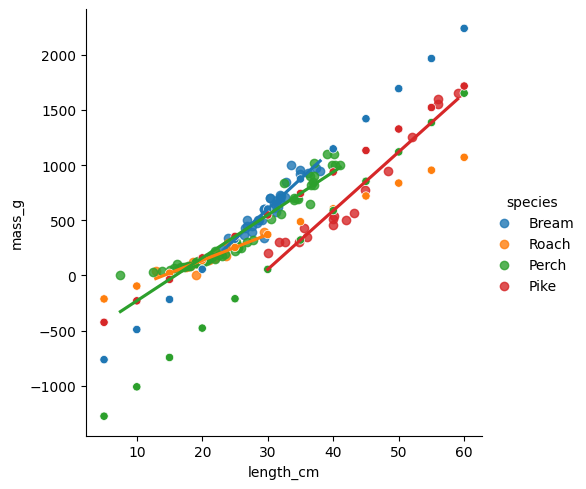

In [20]:
sns.lmplot(x="length_cm", y="mass_g", data=fish, hue="species", ci=None)
sns.scatterplot(x="length_cm", y="mass_g", data=predictions,
                hue="species", legend=False)
plt.show()


# Coefficient of determination and residual standard error

In [21]:
mdl_mass_vs_both.rsquared_adj

0.9174431400543857

In [22]:
mdl_roach.rsquared_adj

0.8152745714517492

In [23]:
mdl_perch.rsquared_adj

0.9169461450648986

In [24]:
mdl_bream.rsquared_adj

0.8743676401060726

In [25]:
mdl_pike.rsquared_adj

0.9410871856517714

- Are these models better  
  - As you can see in some species the coefficient of determination is low compared to the parallel slope model , but in some others it's higher . 
  - using a parallel slope model gives us the opportunity to benefit from the increased power of more rows of data .
  -but in individual models we benefit from not having to satisfy different components of data 

# Interactions
- Creating multiple models for your datset is a pain , using one model to handle all slopes and intercepts may be a good solution .This is achieved by specifying interactions between explanatory variables .<br>

- The effect  of length on the expected mass  is different for different categories or species , **That means length and species interact**<br>

- more generally **There is an interaction between two explanatory variables ,if the effect of one of them on the response depends on the other explanatory variable** , in our case the species variable affect the length variable and consequently the response .<br>
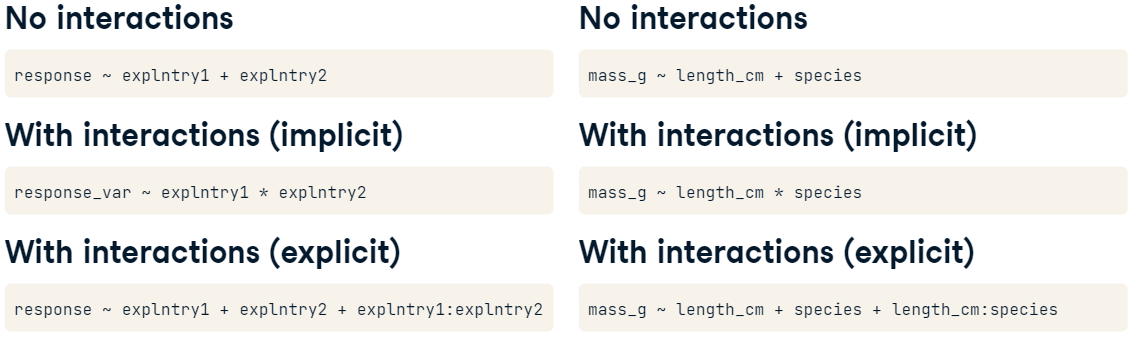<br>


In [26]:
md_interaction=sm.ols("mass_g~length_cm*species",data=fish).fit()


In [27]:
md_interaction.params

Intercept                    -1035.347565
species[T.Perch]               416.172451
species[T.Pike]               -505.476707
species[T.Roach]               705.971354
length_cm                       54.549981
length_cm:species[T.Perch]     -15.638514
length_cm:species[T.Pike]       -1.355115
length_cm:species[T.Roach]     -31.230717
dtype: float64

- This is equivalent to run a model for each category separately .
- The first Intercept and length_cm are for the bream category .
- now it's easier to make predictions and create models instead of running a lot of code .

In [28]:
#let's generate some data and try to do some predictions
prd=product(fish["species"].unique(),np.arange(5,61,5))
explanatory_data=pd.DataFrame(prd,columns=["species","length_cm"])


In [29]:
predictions=explanatory_data.assign(mass_g=md_interaction.predict(explanatory_data))

In [30]:
predictions.head()

,species,length_cm,mass_g
0,Bream,5,-762.597660
1,Bream,10,-489.847756
2,Bream,15,-217.097851
3,Bream,20,55.652054
4,Bream,25,328.401958


<AxesSubplot: xlabel='length_cm', ylabel='mass_g'>

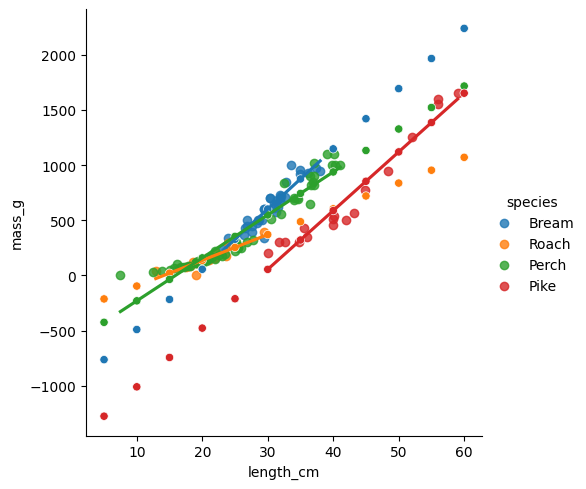

In [31]:
sns.lmplot(x="length_cm" ,y="mass_g" ,hue="species",data=fish,ci=None)
sns.scatterplot(x="length_cm",y="mass_g",hue="species",data=predictions,legend=False)

As you can see we achieved the same result with a few lines of code 

- Let's run these predictions manually 

In [32]:
explanatory_data.head()


,species,length_cm
0,Bream,5
1,Bream,10
2,Bream,15
3,Bream,20
4,Bream,25


In [33]:
coeffs=md_interaction.params
print(coeffs)

Intercept                    -1035.347565
species[T.Perch]               416.172451
species[T.Pike]               -505.476707
species[T.Roach]               705.971354
length_cm                       54.549981
length_cm:species[T.Perch]     -15.638514
length_cm:species[T.Pike]       -1.355115
length_cm:species[T.Roach]     -31.230717
dtype: float64


In [34]:
ic_bream,ic_perch,ic_pike,ic_roach,sl_br,sl_pe,sl_pi,sl_ro=coeffs #Unzipping

condition=[explanatory_data["species"]=="Bream",
explanatory_data["species"]=="Perch",
explanatory_data["species"]=="Pike",
explanatory_data["species"]=="Roach"
]

actions_inter = np.select(condition,[ic_bream,ic_perch,ic_pike,ic_roach])
actions_slope=np.select(condition,[sl_br,sl_pe,sl_pi,sl_ro])

prediction_manual=explanatory_data.assign(mass_g=actions_inter+actions_slope*explanatory_data["length_cm"])
prediction_manual.head()




,species,length_cm,mass_g
0,Bream,5,-762.597660
1,Bream,10,-489.847756
2,Bream,15,-217.097851
3,Bream,20,55.652054
4,Bream,25,328.401958


# Simpsons paradox

- the simpsons paradox occur , when the trend of a model on the whole dataset , is very different from the trends  created on subsets of data .
- As an example playing so much video games decrease marks for students , for each age category but not with the same rate , this may cause a general positive trend but among categories the inverse case .

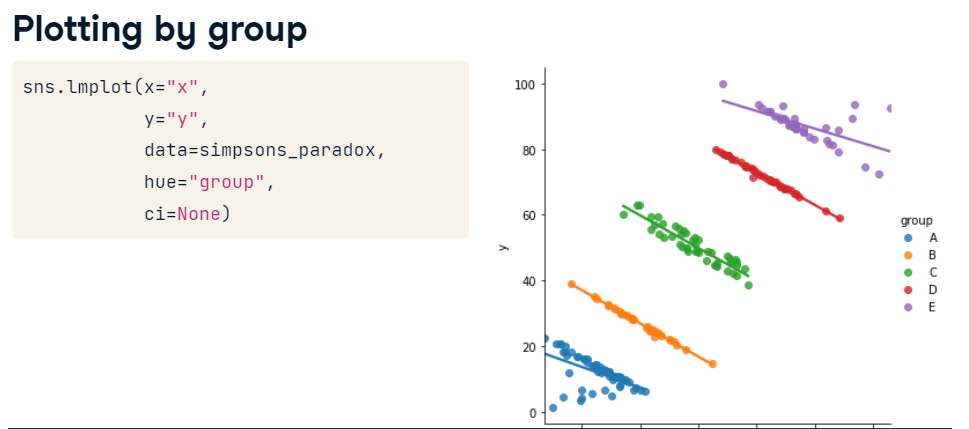

- One remedy to this , its helpful to visualize data , when having different models with conflicting results .
-  The best model to choose depends on the dataset , and the question you are trying to answer .
- before starting to model  ask questions ? why do you need this model for?

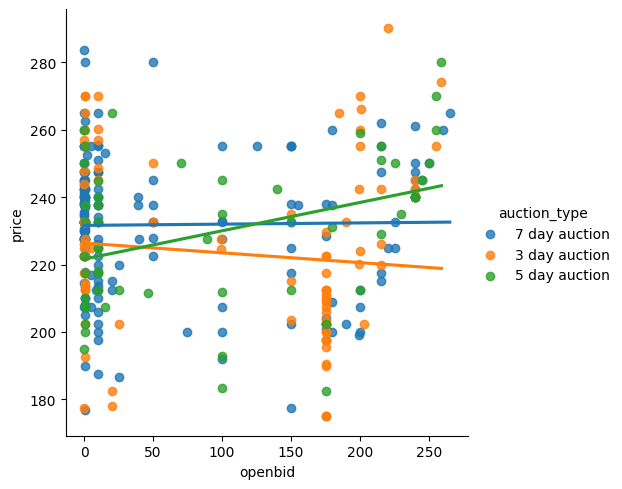

In [35]:
auctions=pd.read_csv("auctions.csv")
# Fit linear regression of price vs. opening bid and auction type, with an interaction, without intercept
mdl_price_vs_both = sm.ols("price ~ auction_type + openbid:auction_type + 0", data=auctions).fit()

# Using auctions, plot price vs. opening bid colored by auction type as a scatter plot with linear regr'n trend lines
sns.lmplot(x="openbid",y="price",hue="auction_type",data=auctions,ci=None)

# Show the plot
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         343 non-null    float64
 1   openbid       343 non-null    float64
 2   auction_type  343 non-null    object 
dtypes: float64(2), object(1)
memory usage: 8.2+ KB
None
Intercept    229.245667
openbid       -0.002098
dtype: float64


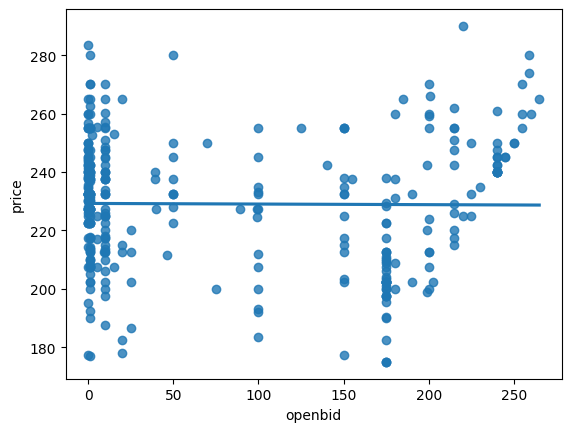

In [36]:
# Take a glimpse at the dataset
print(auctions.info())

# Model price vs. opening bid using auctions
mdl_price_vs_openbid = sm.ols("price ~ openbid", data = auctions).fit()

# See the result
print(mdl_price_vs_openbid.params)

# Plot the scatter plot pf price vs. openbid with a linear trend line
sns.regplot(x="openbid",y="price",data=auctions,ci=None)

# Show the plot
plt.show()

- Which statement about the model resolves Simpson's Paradox?
  - The two models disagree, and the best model to take advice from depends upon the question we are trying to solve.
- the answer to 'Does opening bid affect final sale price?' is no overall, but the answer to 'Does opening bid price affect final sale price for any type of auction?' is yes, for 5 day auctions.

# Linear regression with two or more variables 

- Visualizing linear regression with two variables is somewhat harder using a 3d plot  , 3d plot always suffer perspective issues , the only way to surpass this is to create an interactive 3d plot , that people can view data points from different angles , may be virtual reality will be able to solve this one day . 
- we can use a 2d plot with some configurations :  
   - Setting the color intensity  to be related  to response variable . 
    

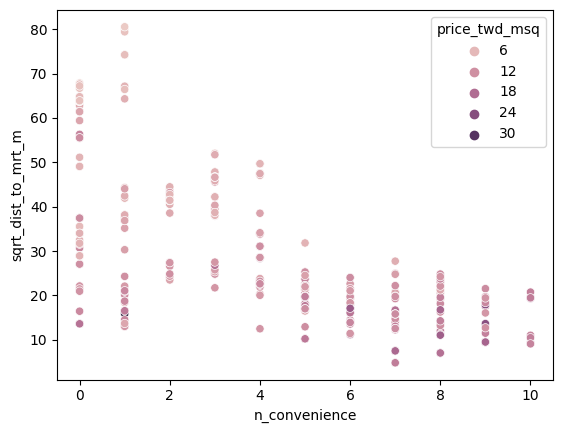

In [37]:
# Transform dist_to_mrt_m to sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Draw a scatter plot of sqrt_dist_to_mrt_m vs. n_convenience colored by price_twd_msq
sns.scatterplot(x="n_convenience",y="sqrt_dist_to_mrt_m",data=taiwan_real_estate,hue="price_twd_msq")

# Show the plot
plt.show()

- The plot suggests that prices are higher when more convenience stores are nearby or when the distance to the nearest MRT station is short. Additionally, there tend to be more convenience stores when the nearest MRT station is close.

In [38]:
# Running predictions 
# Fit linear regression of price vs. no. of conv. stores and sqrt dist. to nearest MRT, no interaction
mdl_price_vs_conv_dist = sm.ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0,11)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0,81,10)

# Create p as all combinations of values of n_convenience and sqrt_dist_to_mrt_m
p = product(n_convenience,sqrt_dist_to_mrt_m)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p,columns=["n_convenience","sqrt_dist_to_mrt_m"])

# Add column of predictions
prediction_data = explanatory_data.assign(price_twd_msq=mdl_price_vs_conv_dist.predict(explanatory_data))

# See the result  
print(prediction_data)


    n_convenience  sqrt_dist_to_mrt_m  price_twd_msq
0               0                   0      15.103790
1               0                  10      13.530787
2               0                  20      11.957784
3               0                  30      10.384781
4               0                  40       8.811778
..            ...                 ...            ...
94             10                  40      10.953984
95             10                  50       9.380981
96             10                  60       7.807978
97             10                  70       6.234975
98             10                  80       4.661972

[99 rows x 3 columns]


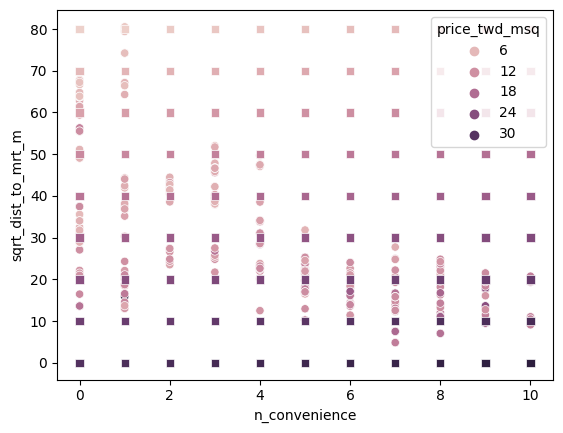

In [39]:
# visualizing predictions 
# Create scatter plot of taiwan_real_estate
sns.scatterplot(y="sqrt_dist_to_mrt_m",x="n_convenience",data=taiwan_real_estate,hue="price_twd_msq")

# Create scatter plot of prediction_data without legend
sns.scatterplot(y="sqrt_dist_to_mrt_m",x="n_convenience",data=prediction_data,hue="price_twd_msq",legend=False,marker="s")

# Show the plot
plt.show()

- As you can see the price of houses is so much higher in the bottom right of the plot , where the number of convenience is higher and distance is lower.


# Include an interaction in the model .

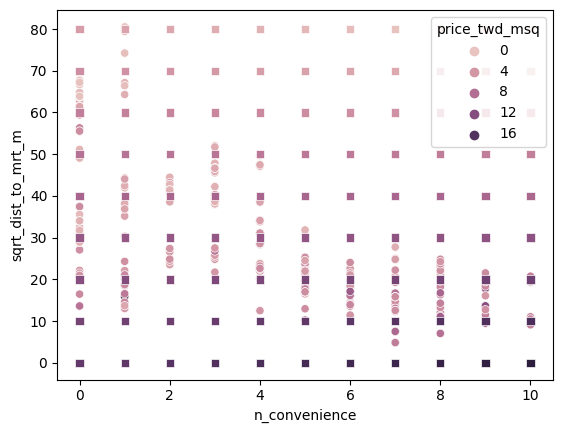

In [40]:
# Convert to mdl_price_vs_conv_dist_inter
mdl_price_vs_conv_dist_inter= sm.ols("price_twd_msq ~ n_convenience*sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use mdl_price_vs_conv_dist_inter to make predictions
n_convenience = np.arange(0, 11)
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)
p = product(n_convenience, sqrt_dist_to_mrt_m)
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "sqrt_dist_to_mrt_m"])
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv_dist_inter.predict(explanatory_data))

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=taiwan_real_estate, hue="price_twd_msq", legend=False)

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=prediction_data, hue="price_twd_msq", marker="s")

plt.show()

- Although the predictions from the model are different now that the interaction is included, the code to create them is the same. The resulting prediction grid is not much different from the model without an interaction.

# Modeling more than two quantitative variables .

- Facetting by a category : 
  - it's possible to use more than one category for facetting 
  -  Beware  of facetting overuse .
  - Plotting become much harder as you increase the number of variables .

- Different levels of interaction :
  - The main tricky thing about including more explanatory variables in models is that there are more options regarding interactions.
  - two way, three way , no interactions ..
  


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoun

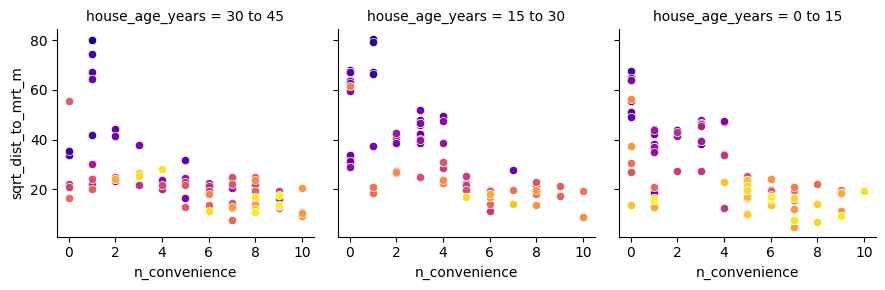

In [43]:
# Prepare the grid using taiwan_real_estate, for each house age category, colored by price_twd_msq
grid = sns.FacetGrid(data=taiwan_real_estate,
            col="house_age_years",
            hue="price_twd_msq",
            palette="plasma")

# Plot the scatterplots with sqrt_dist_to_mrt_m on the x-axis and n_convenience on the y-axis
grid.map(sns.scatterplot,"n_convenience",
         "sqrt_dist_to_mrt_m")

# Show the plot (brighter colors mean higher prices)
plt.show()

- As you can see the more a house is old the more we find darker colors dominating the data points .
- In each case , we remark that the relationship between distance to mrt is negattive with number of convenience , and also , prices tend to be igh the more we have big number of convenience and low distance to mrt .

- This suggets that there is some interactions between these variables .

In [45]:
# Model price vs. sqrt dist. to MRT station, no. of conv. stores & house age, no global intercept, 3-way interactions
mdl_price_vs_all_3_way_inter = sm.ols(
    "price_twd_msq~sqrt_dist_to_mrt_m*house_age_years*n_convenience+0", data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_3_way_inter.params)
# making predictions
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)

# Create house_age_years with unique values
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of n_convenience, sqrt_dist_to_mrt_m, and house_age_years, in that order
p = product(n_convenience, sqrt_dist_to_mrt_m, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience",
                                            "sqrt_dist_to_mrt_m",
                                            "house_age_years"])

# Add column of predictions
prediction_data = explanatory_data.assign(
    price_twd_msq=mdl_price_vs_all_3_way_inter.predict(explanatory_data))

# See the result
print(prediction_data)


house_age_years[0 to 15]                                        16.046849
house_age_years[15 to 30]                                       13.760066
house_age_years[30 to 45]                                       12.088773
sqrt_dist_to_mrt_m                                              -0.162944
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]                   0.036618
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]                   0.061281
n_convenience                                                    0.374982
house_age_years[T.15 to 30]:n_convenience                        0.078370
house_age_years[T.30 to 45]:n_convenience                        0.066720
sqrt_dist_to_mrt_m:n_convenience                                -0.008393
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]:n_convenience    -0.003821
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]:n_convenience     0.004401
dtype: float64
     n_convenience  sqrt_dist_to_mrt_m house_age_years  price_twd_msq
0                0         

- Finding the minimum of sum of squares can be done using many methods . 
-  one of the perks of being a data scientist is not to let python find the minimum for you . 
- You can use minimize function from scipy  : from scipy.optimize import minimize 

- so now we will use the minimize from scipy to minimize the mse of taiwan real estate 

In [46]:
from scipy.optimize import minimize
x_actual=taiwan_real_estate["n_convenience"]
y_actual=taiwan_real_estate["price_twd_msq"]

def calc_sum_sq(coeficients):
    intercept,slope=coeficients
    y_pred=intercept+slope*x_actual
    y_diff=y_pred-y_actual
    sum_sq=np.sum((y_diff)**2)
    return sum_sq







In [48]:
results = minimize(calc_sum_sq,x0=[0,10])

In [49]:
results

      fun: 4717.686239925701
 hess_inv: array([[ 0.00356512, -0.00057554],
       [-0.00057554,  0.00014037]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 7
     njev: 10
   status: 0
  success: True
        x: array([8.22423773, 0.79807967])

In [52]:
#Coefficients :
results.x

array([8.22423773, 0.79807967])

In [53]:
# okey so let's fit a linear regression model and find results 

mdl=sm.ols("price_twd_msq~n_convenience",data=taiwan_real_estate).fit()
print(mdl.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


- We found  The same result  as before . 

# Multiple logistic regression


- The creation of the model will be using the logit function from statsmodels . 
- The prediction workflow and interactions are the same as linear regression . 
- The cdf of logistic regression is : $\frac{1}{1+exp(-x)}$

<AxesSubplot: xlabel='x', ylabel='prob'>

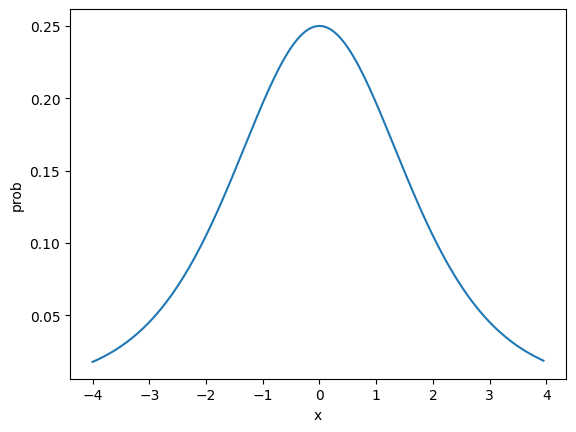

In [55]:
#lOGISTIC PDF 
from scipy.stats import logistic 
x=np.arange(-4,4,0.05)
logistic_dist=pd.DataFrame({"x":x,"prob":logistic.pdf(x)})
sns.lineplot(x="x",y="prob",data=logistic_dist)
#the logistic distribution function looks like a gaussian curve but it has fatter tails 



<AxesSubplot: xlabel='x', ylabel='prob'>

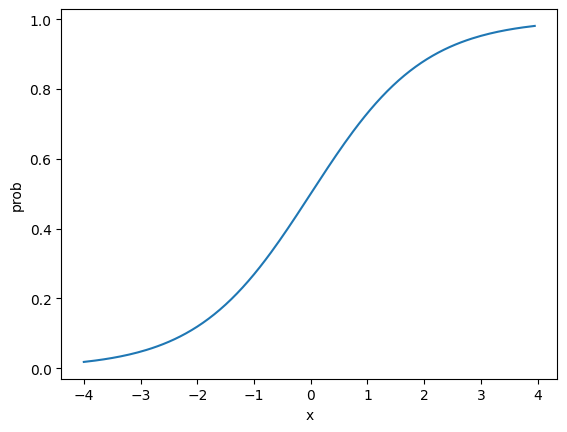

In [58]:
logistic_dist_cdf=pd.DataFrame({"x":x,"prob":logistic.cdf(x)})
sns.lineplot(x="x",y="prob",data=logistic_dist_cdf)

- The loss function in logistic regression is not the same as linear regression , because mse performs poorly in logistic regression . 
- instead we use log likelihood . 
- $log\_likelihood=log(y_{pred})*y_{actual}+log(1-y_{pred})*(1-y_{actual})$
- to run this on all predictions , we need to minimise -(sum(log_likelihood(i))) for each observation i , or maximize (sum(log_likelihood(i)))

In [72]:
# minimising the function 
churn =pd.read_csv("churn_data.csv")
x_actual=churn["time_since_last_purchase"]
y_actual=churn["has_churned"]



# Complete the function
def calc_neg_log_likelihood(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs
    # Calculate predicted y-values
    y_pred = logistic.cdf(intercept+slope*x_actual)
    # Calculate log-likelihood
    log_likelihood = np.log(y_pred)
    # Calculate negative sum of log_likelihood
    neg_sum_ll = -np.sum(np.log(y_pred) * y_actual + np.log(1 - y_pred) * (1 - y_actual))
    # Return negative sum of log_likelihood
    return neg_sum_ll
# Test the function with intercept 10 and slope 1
print(calc_neg_log_likelihood([10, 1]))



1997.9624945172732


In [73]:
# let's maximise the log likelihood 
# the minimize function is already imported 
result = minimize(calc_neg_log_likelihood,x0=[1,2])

In [74]:
result.x

array([-0.03501941,  0.26921491])

In [76]:
print(sm.logit("has_churned ~ time_since_last_purchase", data=churn).fit().params)

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4
Intercept                  -0.035019
time_since_last_purchase    0.269215
dtype: float64
